## Pitch Names Predictor

In [1]:
import numpy as np
import math

from htm.bindings.sdr import SDR
from htm.bindings.encoders import ScalarEncoder, ScalarEncoderParameters
from htm.algorithms import SpatialPooler as SP
from htm.algorithms import TemporalMemory as TM
from htm.bindings.algorithms import Predictor
from htm.bindings.algorithms import Classifier

import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

In [2]:
pitchNames = ("C","D","E","F","G","A","B")

scalarEncoderParams = ScalarEncoderParameters()
scalarEncoderParams.minimum = 0
scalarEncoderParams.maximum = 6
scalarEncoderParams.activeBits = 3
scalarEncoderParams.category = True

enc = ScalarEncoder(scalarEncoderParams)

In [3]:
inputSDR  = SDR( dimensions = (21, ) )
activeSDR = SDR( dimensions = (576,) )
sp = SP(inputDimensions  = inputSDR.dimensions,
        columnDimensions = activeSDR.dimensions,
        localAreaDensity = 0.02,
        globalInhibition = True,
        seed             = 1,
        synPermActiveInc   = 0.01,
        synPermInactiveDec = 0.008)

In [4]:
tm = TM(
    columnDimensions = (576,),
    cellsPerColumn=8,
    initialPermanence=0.5,
    connectedPermanence=0.5,
    minThreshold=8,
    maxNewSynapseCount=20,
    permanenceIncrement=0.1,
    permanenceDecrement=0.0,
    activationThreshold=8,
)

In [5]:
#twinkle = ["C","C","G","G","A","A","G","F","F","E","E","D","D","C"]
twinkle=[0,0,4,4,5,5,4,3,3,2,2,1,1,0]

seq =[]
for i in range(10):
    seq.extend(twinkle)
print(seq)

[0, 0, 4, 4, 5, 5, 4, 3, 3, 2, 2, 1, 1, 0, 0, 0, 4, 4, 5, 5, 4, 3, 3, 2, 2, 1, 1, 0, 0, 0, 4, 4, 5, 5, 4, 3, 3, 2, 2, 1, 1, 0, 0, 0, 4, 4, 5, 5, 4, 3, 3, 2, 2, 1, 1, 0, 0, 0, 4, 4, 5, 5, 4, 3, 3, 2, 2, 1, 1, 0, 0, 0, 4, 4, 5, 5, 4, 3, 3, 2, 2, 1, 1, 0, 0, 0, 4, 4, 5, 5, 4, 3, 3, 2, 2, 1, 1, 0, 0, 0, 4, 4, 5, 5, 4, 3, 3, 2, 2, 1, 1, 0, 0, 0, 4, 4, 5, 5, 4, 3, 3, 2, 2, 1, 1, 0, 0, 0, 4, 4, 5, 5, 4, 3, 3, 2, 2, 1, 1, 0]


In [6]:
predictor = Predictor( steps=[1,2,3,4,5])
resolution = 1

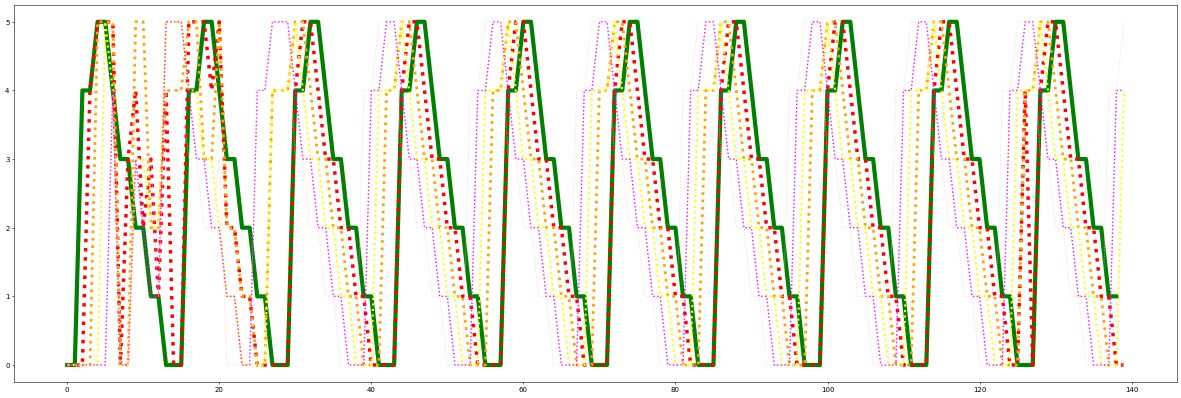

{1: [0.0, 0, 0, 4, 5, 5, 5, 0, 3, 4, 2, 3, 1, 4, 0, 0, 5, 5, 5, 4, 5, 2, 2, 1, 1, 0, 0, 0, 0, 0, 4, 5, 5, 4, 3, 3, 2, 2, 1, 1, 0, 0, 0, 0, 4, 5, 5, 4, 3, 3, 2, 2, 1, 1, 0, 0, 0, 0, 4, 5, 5, 4, 3, 3, 2, 2, 1, 1, 0, 0, 0, 0, 4, 5, 5, 4, 3, 3, 2, 2, 1, 1, 0, 0, 0, 0, 4, 5, 5, 4, 3, 3, 2, 2, 1, 1, 0, 0, 0, 0, 4, 5, 5, 4, 3, 3, 2, 2, 1, 1, 0, 0, 0, 0, 4, 5, 5, 4, 3, 3, 2, 2, 1, 1, 0, 0, 4, 0, 4, 5, 5, 4, 3, 3, 2, 2, 1, 1, 0, 0], 2: [0.0, 0.0, 0, 0, 5, 5, 5, 0, 0, 5, 5, 2, 2, 4, 4, 4, 5, 5, 3, 3, 5, 2, 2, 1, 1, 0, 0, 4, 4, 4, 5, 5, 4, 3, 3, 2, 2, 1, 1, 0, 0, 0, 4, 4, 5, 5, 4, 3, 3, 2, 2, 1, 1, 0, 0, 0, 4, 4, 5, 5, 4, 3, 3, 2, 2, 1, 1, 0, 0, 0, 4, 4, 5, 5, 4, 3, 3, 2, 2, 1, 1, 0, 0, 0, 4, 4, 5, 5, 4, 3, 3, 2, 2, 1, 1, 0, 0, 0, 4, 4, 5, 5, 4, 3, 3, 2, 2, 1, 1, 0, 0, 0, 4, 4, 5, 5, 4, 3, 3, 2, 2, 1, 1, 0, 0, 0, 4, 4, 5, 5, 4, 3, 3, 2, 2, 1, 1, 0, 0, 0], 3: [0.0, 0.0, 0.0, 0, 0, 5, 4, 0, 0, 3, 3, 2, 2, 5, 5, 5, 4, 4, 3, 3, 2, 1, 1, 0, 0, 0, 0, 4, 4, 4, 5, 4, 3, 3, 2, 2, 1, 1, 0, 0, 0, 4, 4, 4, 5

In [7]:
predictions = {1: [], 2: [], 3: [], 4: [], 5: []}
for i in range(len(seq)):
    
    inputSDR = enc.encode(seq[i])
    sp.compute(inputSDR, True, activeSDR)

    tm.compute( activeSDR, learn=True)
    
    predictor.learn(i, tm.getActiveCells(), int(seq[i]/ resolution))

    pdf = predictor.infer( tm.getActiveCells() )
    for n in (1,2,3,4,5):
        if pdf[n]:
            predictions[n].append( np.argmax( pdf[n] ) * resolution  )
            print(pitchNames[np.argmax( pdf[n] ) * resolution])
        else:
            predictions[n].append(float(0))
            print("nan")
            
    clear_output(wait = True)
    plt.cla
    plot = plt.figure(figsize=(30,10),dpi=50)
    plt.plot(seq[0:i], color='green', linestyle = "solid", linewidth = 6.0)
    plt.plot(predictions[1], color='red', linestyle = "dotted", linewidth = 5.0)
    plt.plot(predictions[2], color='orange', linestyle = "dotted", linewidth = 4.0)
    plt.plot(predictions[3], color='yellow', linestyle = "dotted", linewidth = 3.0)
    plt.plot(predictions[4], color='magenta', linestyle = "dotted", linewidth = 2.0)
    plt.plot(predictions[5], color='pink', linestyle = "dotted", linewidth = 1.0)
    plt.show()
    
print(predictions)